In [1]:
#include autoreload modules for fast testing and update
%load_ext autoreload
%autoreload 2

#import relevant modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import helpers modules
import sys
import os
import datetime

#set maximu columns display pandas
pd.options.display.max_columns = 50

In [2]:
df=pd.read_csv('../data/raw/DE_Continuous_Orders_20200305.csv', sep=';')

In [3]:
df.head()

,Order ID,Initial ID,Parent ID,Entry time,Action code,Transaction Time,Validity time,Delivery Start,Delivery End,Product,Delivery area,Market area,Side,Price,Currency,Quantity,isOTC,RevisionNo,Is User Defined Block,Execution restriction,Unnamed: 20
0,10683176416,10683176416,NaN,2020-03-04T22:32:04.898Z,X,2020-03-04T23:00:00.002Z,2020-03-04T23:00:00Z,2020-03-04T23:30:00Z,2020-03-04T23:45:00Z,Intraday_Quarter_Hour_Power,AMP,DE,Buy,10.0,EUR,20.0,N,2,0,NON,NaN
1,10683191815,10683191815,NaN,2020-03-04T22:49:18.604Z,X,2020-03-04T23:00:00.002Z,2020-03-04T23:00:00Z,2020-03-04T23:15:00Z,2020-03-04T23:30:00Z,Intraday_Quarter_Hour_Power,TNG,DE,Sell,36.4,EUR,0.2,N,2,0,NON,NaN
2,10683191816,10683191816,NaN,2020-03-04T22:49:18.604Z,X,2020-03-04T23:00:00.002Z,2020-03-04T23:00:00Z,2020-03-04T23:30:00Z,2020-03-04T23:45:00Z,Intraday_Quarter_Hour_Power,TNG,DE,Sell,41.0,EUR,0.5,N,2,0,NON,NaN
3,10683191836,10683191836,NaN,2020-03-04T22:49:18.604Z,X,2020-03-04T23:00:00.002Z,2020-03-04T23:00:00Z,2020-03-04T23:15:00Z,2020-03-04T23:30:00Z,Intraday_Quarter_Hour_Power,50HzT,DE,Sell,36.4,EUR,0.2,N,2,0,NON,NaN
4,10683191846,10683191846,NaN,2020-03-04T22:49:18.604Z,X,2020-03-04T23:00:00.002Z,2020-03-04T23:00:00Z,2020-03-04T23:15:00Z,2020-03-04T23:30:00Z,Intraday_Quarter_Hour_Power,TTG,DE,Sell,36.4,EUR,1.0,N,3,0,NON,NaN


Contract length

In [5]:
df.shape

(2028453, 21)

In [10]:
df[df['Order ID']==10683318404]['Side'].unique()

array(['Sell'], dtype=object)

In [13]:
df['Initial ID'].value_counts()

10684086096    3370
10683864427    3260
10683973502    2658
10684085038    2630
10684047770    2359
               ... 
10684054971       1
10684159462       1
10684190197       1
10682916952       1
10682920974       1
Name: Initial ID, Length: 408115, dtype: int64

In [6]:
df['Order ID'].value_counts()

10683866282    2907
10683318404    1064
10684195809    1001
10683866372     999
10683828579     974
               ... 
10683055331       1
10682930366       1
10683200570       1
10684267989       1
10682920974       1
Name: Order ID, Length: 927201, dtype: int64

In [15]:
ordersID=set(df['Order ID'].unique().tolist())
orders_initial_ID=set(df['Initial ID'].unique().tolist())

In [16]:
orders_initial_ID.intersection(ordersID)

{10683940881,
 10683940882,
 10683940883,
 10683940884,
 10683940885,
 10683940886,
 10683940896,
 10683940900,
 10683940902,
 10683940903,
 10683940905,
 10683940907,
 10683940909,
 10683940910,
 10683940911,
 10683940912,
 10683940913,
 10683940914,
 10683940917,
 10683940922,
 10683940923,
 10683940924,
 10683940938,
 10683940939,
 10683940952,
 10683940958,
 10683940959,
 10683940960,
 10683940961,
 10683940962,
 10683940963,
 10683940974,
 10683940976,
 10683940977,
 10683940978,
 10683940985,
 10683940989,
 10683940990,
 10683940992,
 10683940993,
 10683940994,
 10683941000,
 10683941001,
 10683941006,
 10683941007,
 10683941008,
 10683941012,
 10683941013,
 10683941014,
 10683941025,
 10683941030,
 10683941031,
 10683941034,
 10683941035,
 10683941049,
 10683941052,
 10683941053,
 10683941054,
 10683941056,
 10683941058,
 10683941059,
 10683941060,
 10683941061,
 10683941062,
 10683941063,
 10683941087,
 10683941093,
 10683941099,
 10683941102,
 10683941103,
 10683941104,
 10683

In [10]:
diff=pd.to_datetime(df['Delivery End'])-pd.to_datetime(df['Delivery Start'])

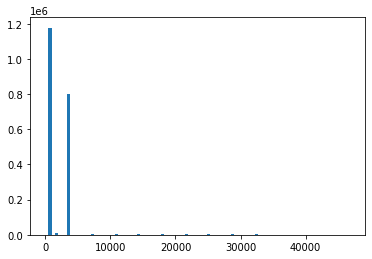

In [20]:
s=plt.hist(diff.dt.seconds, bins=100)

In [6]:
df['Delimicrosecondsery area'].unique()

array(['AMP', 'TNG', '50HzT', 'TTG'], dtype=object)

Questions:

1) Utilized capacity and actual value difference: this is what we need to assess how much cross border capacity there would be

***German-Swiss Transnet data downloaded manually from the [website](https://www.transnetbw.com/en/energy-market/congestion-management/de-ch?direction=ChDe&date=2020-10-14)***

In [111]:
df_transnet_explict_auction=pd.read_csv('../data/raw/mintraday_d_ch_de_2020_10.csv',sep=';')

In [112]:
df_transnet_explict_auction.head(15)

,Date from,Time from,Date from.1,Time to,Utilized capacity (MW),Actual value (MW),Intraday has taken place
0,01.10.2020,00:00,01.10.2020,00:15,0,1200,Yes
1,01.10.2020,00:15,01.10.2020,00:30,0,1200,Yes
2,01.10.2020,00:30,01.10.2020,00:45,0,1200,Yes
3,01.10.2020,00:45,01.10.2020,01:00,0,1200,Yes
4,01.10.2020,01:00,01.10.2020,01:15,58,1142,Yes
5,01.10.2020,01:15,01.10.2020,01:30,58,1142,Yes
6,01.10.2020,01:30,01.10.2020,01:45,58,1142,Yes
7,01.10.2020,01:45,01.10.2020,02:00,58,1142,Yes
8,01.10.2020,02:00,01.10.2020,02:15,596,604,Yes
9,01.10.2020,02:15,01.10.2020,02:30,596,604,Yes


Transnet explict auction capacity plot

In [114]:
#obtain new colum with time
df_transnet_explict_auction['time']=pd.to_datetime(df_transnet_explict_auction['Date from'], format='%d.%m.%Y')+\
pd.to_timedelta(pd.to_datetime(df_transnet_explict_auction['Time from']).dt.hour, unit='h')

In [118]:
df_transnet_explict_auction.head()

,Date from,Time from,Date from.1,Time to,Utilized capacity (MW),Actual value (MW),Intraday has taken place,time
0,01.10.2020,00:00,01.10.2020,00:15,0,1200,Yes,2020-10-01 00:00:00
1,01.10.2020,00:15,01.10.2020,00:30,0,1200,Yes,2020-10-01 00:00:00
2,01.10.2020,00:30,01.10.2020,00:45,0,1200,Yes,2020-10-01 00:00:00
3,01.10.2020,00:45,01.10.2020,01:00,0,1200,Yes,2020-10-01 00:00:00
4,01.10.2020,01:00,01.10.2020,01:15,58,1142,Yes,2020-10-01 01:00:00


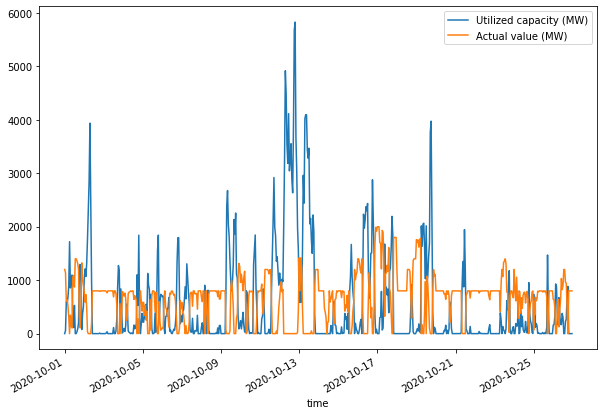

In [119]:
ax=df_transnet_explict_auction.plot(x='time', y=['Utilized capacity (MW)', 'Actual value (MW)'], figsize=(10,7))